In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import requests

In [4]:
df_id = pd.read_csv('/content/drive/MyDrive/Projects/Cherry Blossom/CODE/Liestal-Weideli/Data/japan_station_info.csv')

In [ ]:
df_list = []

In [9]:
row['STATION']

'JAM00047401'

In [8]:
for index, row in df_id.iterrows():
  # API 请求参数
  base_url = "https://www.ncei.noaa.gov/access/services/data/v1"
  params = {
      "dataset": "daily-summaries",
      "stations": f"{row['STATION']}",  # 目标站点
      "datatypeid": ["TMAX", "TMIN", "TAVG", "PRCP", "RHUM", "SUNH", "SNOW"],
      "startDate": "1950-01-01", # "2000-01-01", "1900-01-01"
      "endDate": "2025-2-21", # "1999-12-31", "2025-2-24"
      "format": "json"
  }

  # 发送请求
  response = requests.get(base_url, params=params)

  if response.status_code == 200:
      data = response.json()
      df = pd.DataFrame(data)
  else:
    print(response.status_code)
  df_list.append(df)

400


NameError: name 'df_list' is not defined

In [ ]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# API 请求参数
base_url = "https://www.ncei.noaa.gov/access/services/data/v1"
params = {
    "dataset": "daily-summaries",
    "stations": "SZ000001940",  # 目标站点
    "datatypeid": ["TMAX", "TMIN", "TAVG", "PRCP", "RHUM", "SUNH", "SNOW"],
    "startDate": "2000-01-01",
    "endDate": "2025-02-21",
    "format": "json"
}


# 发送请求
response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)

df

DATE      STATION   TMAX   TMIN   SNOW   PRCP   SNWD WT04 WT05  \
0      1939-10-07  USW00014732    256    172    NaN    NaN    NaN  NaN  NaN   
1      1939-10-08  USW00014732    217    139    NaN    NaN    NaN  NaN  NaN   
2      1939-10-09  USW00014732    272    172    NaN    NaN    NaN  NaN  NaN   
3      1939-10-10  USW00014732    311    178    NaN    NaN    NaN  NaN  NaN   
4      1939-10-11  USW00014732    244    206    NaN    NaN    NaN  NaN  NaN   
...           ...          ...    ...    ...    ...    ...    ...  ...  ...   
21996  1999-12-27  USW00014732     17    -11      0      0      0  NaN  NaN   
21997  1999-12-28  USW00014732     -6    -61      0      0      0  NaN  NaN   
21998  1999-12-29  USW00014732     28    -17      0      0      0  NaN  NaN   
21999  1999-12-30  USW00014732    100     22      0      0      0  NaN  NaN   
22000  1999-12-31  USW00014732     67     17      0     13      0  NaN  NaN   

        WT16  ... WT17   WSF2   WSF5   WDF2   WDF5   WT13 WT22 WT11 WT21  \
0        NaN  ...  NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN   
1        NaN  ...  NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN   
2        NaN  ...  NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN   
3        NaN  ...  NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN   
4        NaN  ...  NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN   
...      ...  ...  ...    ...    ...    ...    ...    ...  ...  ...  ...   
21996    NaN  ...  NaN    103    139    310    280    NaN  NaN  NaN  NaN   
21997    NaN  ...  NaN     98    107    320    310    NaN  NaN  NaN  NaN   
21998    NaN  ...  NaN     98    125    220    280    NaN  NaN  NaN  NaN   
21999    NaN  ...  NaN     98    134    270    240    NaN  NaN  NaN  NaN   
22000      1  ...  NaN     58     67     50     60      1  NaN  NaN  NaN   

        TAVG  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
21996      6  
21997    -33  
21998      6  
21999     61  
22000     44  

[22001 rows x 45 columns]

In [ ]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# API 请求参数
base_url = "https://www.ncei.noaa.gov/access/services/data/v1"
params = {
    "dataset": "daily-summaries",
    "stations": "JA000047759",  # 目标站点
    "datatypeid": ["TMAX", "TMIN", "TAVG", "PRCP", "RHUM", "SUNH", "SNOW"],
    "startDate": "2000-01-01",
    "endDate": "2025-02-21",
    "format": "json"
}


# 发送请求
response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)

df

DATE      STATION   TMAX   TAVG   PRCP   TMIN SNWD
0     2000-01-01  JA000047759     93     59     15    NaN  NaN
1     2000-01-02  JA000047759    117     78    NaN     15  NaN
2     2000-01-03  JA000047759    149     82    NaN    NaN  NaN
3     2000-01-04  JA000047759    114     72    NaN    NaN  NaN
4     2000-01-05  JA000047759    134     97    NaN     33  NaN
...          ...          ...    ...    ...    ...    ...  ...
8568  2025-02-17  JA000047759    106     41      0    NaN  NaN
8569  2025-02-18  JA000047759     70     28      0      2  NaN
8570  2025-02-19  JA000047759     57     18      0    NaN  NaN
8571  2025-02-20  JA000047759     71     33      0     -8  NaN
8572  2025-02-21  JA000047759     70     32      0     -2  NaN

[8573 rows x 7 columns]

In [ ]:
# Check available columns
print("Columns before processing:", df.columns)

# Ensure 'DATE' column is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# Sort by date
df = df.sort_values(by='DATE', ascending=False).reset_index(drop=True)

# Drop unnecessary columns if they exist
cols_to_drop = ['TAVG', 'STATION', 'SNWD']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

# Fill missing precipitation values
if 'PRCP' in df.columns:
    df['PRCP'].fillna(0, inplace=True)

# Convert temperature values from tenths of a degree to degrees
for col in ['TMAX', 'TMIN', 'TAVG']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: int(x) / 10 if pd.notna(x) else x)

# Function to fill missing temperature values
def fill_missing_tmax(df, column="TMAX", window=7):
    df_filled = df.copy()
    if column not in df_filled.columns:
        return df_filled  # Skip if column does not exist

    nan_indices = df_filled[df_filled[column].isna()].index

    for idx in nan_indices:
        start = max(idx - window, 0)
        end = min(idx + window + 1, len(df_filled))
        window_values = df_filled[column].iloc[start:end].dropna().values
        if len(window_values) > 0:
            df_filled.at[idx, column] = np.mean(window_values)

    return df_filled

# Apply missing value filling
df = fill_missing_tmax(df, column="TMAX", window=7)
df = fill_missing_tmax(df, column="TMIN", window=7)

# Final DataFrame check
print("Columns after processing:", df.columns)


Columns before processing: Index(['DATE', 'STATION', 'TMAX', 'TAVG', 'PRCP', 'TMIN'], dtype='object')
Columns after processing: Index(['DATE', 'TMAX', 'PRCP', 'TMIN'], dtype='object')


<ipython-input-45-4ffbc8ee3f11>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRCP'].fillna(0, inplace=True)


In [ ]:
df.to_csv('/content/drive/MyDrive/Kyoto/Data/Kyoto_weather.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据（假设数据已经获取并存入 DataFrame df）
# df = pd.read_csv("noaa_data.csv")  # 如果数据来自 CSV 文件

# 确保 DATE 是 datetime 格式
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# 绘制温度的直方图（TMAX）
plt.figure(figsize=(10, 6))
plt.hist(df["TMAX"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Temperature (TMAX)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

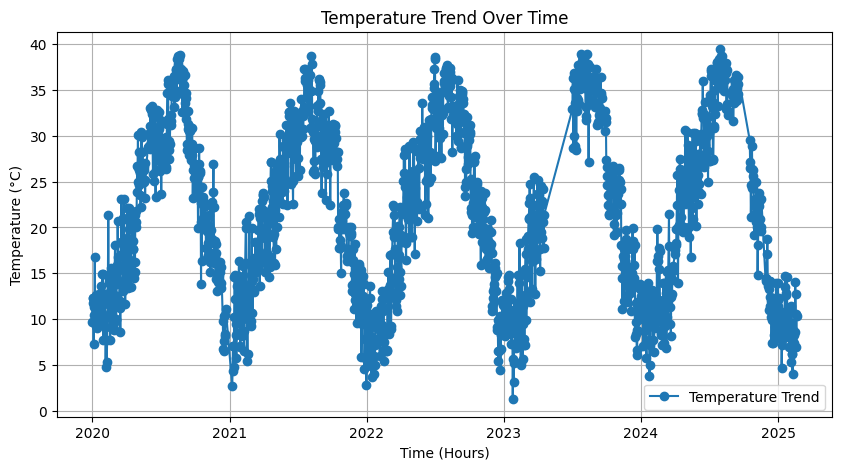

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df.dropna(subset=['TMAX'])
# Plot temperature trend
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['DATE'], df_filtered['TMAX'], marker='o', linestyle='-', label="Temperature Trend")
plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/Kyoto/Data/"
print("Files in directory:", os.listdir(path))


Files in directory: ['Kyoto_weather.csv']


In [ ]:
file_path = '/content/drive/MyDrive/Kyoto/Data/kyoto.csv'
df_cherry = pd.read_csv(file_path)
df_cherry.rename(columns={'bloom_date': 'DATE'}, inplace=True)
df_cherry["DATE"] = pd.to_datetime(df_cherry["DATE"], errors="coerce")

<ipython-input-52-092318d413b6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cherry["DATE"] = pd.to_datetime(df_cherry["DATE"], errors="coerce")


In [ ]:
df_cherry.columns

Index(['location', 'lat', 'long', 'alt', 'year', 'DATE', 'bloom_doy'], dtype='object')

In [ ]:
df_cherry[['location', 'year', 'DATE', 'bloom_doy']]

location  year       DATE  bloom_doy
0      kyoto   812        NaT         92
1      kyoto   815        NaT        105
2      kyoto   831        NaT         96
3      kyoto   851        NaT        108
4      kyoto   853        NaT        104
..       ...   ...        ...        ...
831    kyoto  2020 2020-04-01         92
832    kyoto  2021 2021-03-26         85
833    kyoto  2022 2022-04-01         91
834    kyoto  2023 2023-03-25         84
835    kyoto  2024 2024-04-04         95

[836 rows x 4 columns]